**<h1><span style="color: BurlyWood;">Brain Tumor Classification with Convolutional Neural Networks</span></h2>**

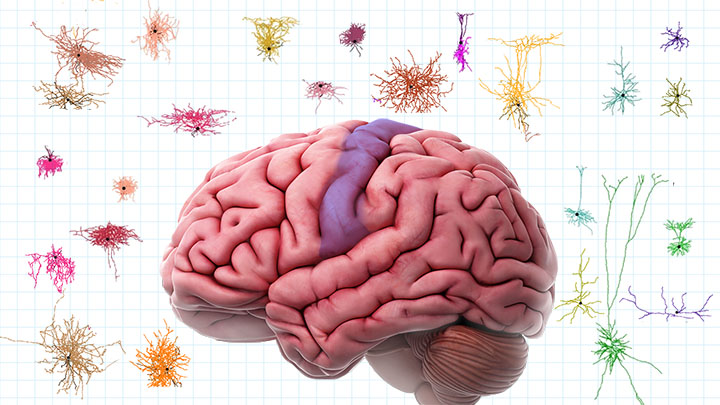

In [11]:
from IPython.display import Image,Markdown, display #importing the cover image
image_path = r'C:\Users\Podos\OneDrive\Desktop\Data_science\Dataset\Brain_tumor_detection\Data\brain.jpg'
# Display the image
Image(filename=image_path,width=1000, height=800)

**<h2><span style="color: BurlyWood;">Table Of Content</span></h2>**
* 1.0 Introduction
* 2.0  Libraries & Functions
  * 2.1 Libraries
  * 2.2 functions
* 3.0 Image Pre-Processing
* 4.0 CNN Model
* 5.0 Model Evaluation

**<h1><span style="color: BurlyWood;">1.0 Introduction</span></h2>**

The healthcare system in Nigeria is facing a critical shortage of neurological surgeons, placing immense pressure on the existing workforce. This shortage is particularly alarming given the rising prevalence of brain tumors, which require timely and precise diagnosis. In an environment where every second counts, the integration of machine learning (ML) models into medical practice can provide a much-needed respite. By automating the classification of brain tumors using Convolutional Neural Networks (CNN), we can significantly reduce the workload of surgeons. This technology not only speeds up the diagnostic process but also ensures accuracy, allowing healthcare professionals to focus on patient care and complex surgical interventions. This report explores the development and application of a CNN model designed to aid in the classification of brain tumors, ultimately aiming to improve patient outcomes and alleviate the burden on Nigeria's healthcare system.


## Objective:

The objective of this project is to develop and deploy a robust Convolutional Neural Network (CNN) model for the classification of brain tumors. By leveraging advanced machine learning techniques, the model aims to provide accurate, rapid, and automated diagnosis of brain tumors, thereby alleviating the workload of neurological surgeons in Nigeria. This initiative seeks to improve patient outcomes by enabling timely intervention and treatment, addressing the critical shortage of specialists, and enhancing the overall efficiency of the healthcare system.e.

## Data Sources:

The dataset for this project was sourced from a comprehensive brain tumor repository on Kaggle. This dataset includes detailed images of various types of brain tumors, providing a robust foundation for training and validating the Convolutional Neural Network model. Utilizing this well-curated dataset ensures the reliability and accuracy of the machine learning model, as it encompasses a diverse array of tumor images necessary for effective classification.

## Summary:

The model attained a precision and recall score of 0.9 each, along with an accuracy of 0.9.

**<h1><span style="color: BurlyWood;">2.0 Libraries and Functions</span></h2>**

Importing all relevant python libraries for the Exploratory data and analysis

## 2.1 Libraries
importing relevant libraries and declaring functions

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset,Subset  # Import DataLoader
import matplotlib.pyplot as plt
from torchmetrics import Recall,Precision, Accuracy
from torchmetrics.classification import Accuracy
from PIL import Image
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt


## 2.2 Functions
Defining functions to be used in the analysis.

In [13]:
#creating the CNN
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten())
        #classifier
        self.classifier = nn.Linear(64*32*32, num_classes)
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x
    
def count_folders(directory):
    folder_count = 0
    for entry in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, entry)):
            folder_count += 1
    return folder_count
sns.set_theme(style="whitegrid")

**<h1><span style="color: BurlyWood;">3.0 Image Pre-Processing</span></h2>**
Pre-processing the images to prepare them for the machine learning classification

In [14]:
# Load the dataset
path= r'C:\Users\Podos\OneDrive\Desktop\Data_science\Dataset\Brain_tumor_detection\Data'
dataset = ImageFolder(root=path)

# Extract image data and labels
labels = [sample[1] for sample in dataset]

#split the dataset into training (70%) and test+validation (30%)
split_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=42)
train_idx_1, test_val_idx = next(split_1.split(dataset.samples, labels))

# plit the test+validation set into validation (10%) and test (20%) -
split_2 = StratifiedShuffleSplit(n_splits=1, test_size=2/3, random_state=42)
val_idx, test_idx = next(split_2.split([dataset.samples[i] for i in test_val_idx], [labels[i] for i in test_val_idx]))

# Mapping the indices back to original dataset
val_idx = [test_val_idx[i] for i in val_idx]
test_idx = [test_val_idx[i] for i in test_idx]

# Creating the datasets
train_dataset = Subset(dataset, train_idx_1)
val_dataset = Subset(dataset, val_idx)
test_dataset = Subset(dataset, test_idx)

# Define transformations
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAutocontrast(),
    transforms.ToTensor()])

test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()])

# Apply transformations
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = test_transform
test_dataset.dataset.transform = test_transform

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}")


Train size: 15170, Validation size: 2167, Test size: 4335


In [15]:
# Get the labels from the train and test datasets
train_labels = [dataset.samples[i][1] for i in train_dataset.indices]
test_labels = [dataset.samples[i][1] for i in test_dataset.indices]
val_labels = [dataset.samples[i][1] for i in val_dataset.indices]

# Count the occurrences of each label
train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)
val_label_counts = Counter(val_labels)

# Print the counts
print("Training dataset label counts:", train_label_counts)
print("Test dataset label counts:", test_label_counts)
print("Validation dataset label counts:", val_label_counts)

Training dataset label counts: Counter({2: 4474, 1: 4415, 3: 4135, 0: 2146})
Test dataset label counts: Counter({2: 1278, 1: 1262, 3: 1182, 0: 613})
Validation dataset label counts: Counter({2: 639, 1: 630, 3: 591, 0: 307})


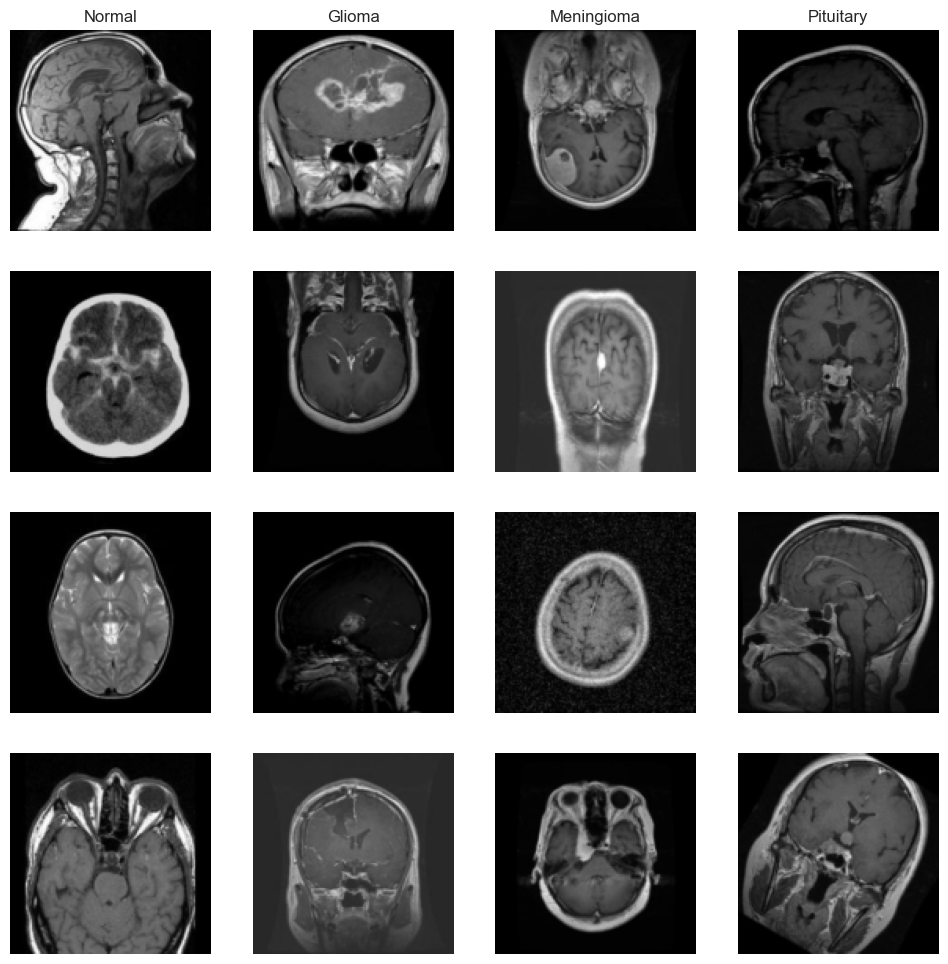

In [16]:
# Geting images and labels from the train loader
images, labels = next(iter(train_loader))

# Defining the label mapping
label_mapping = {0: 'Normal', 1: 'Glioma', 2: 'Meningioma', 3: 'Pituitary'}

# Initialize a dictionary to store images for each class
class_images = {label: [] for label in label_mapping.keys()}

# Collectiing 4 images for each class
for img, lbl in zip(images, labels):
    if len(class_images[lbl.item()]) < 4:
        class_images[lbl.item()].append(img)
    if all(len(class_images[label]) >= 4 for label in label_mapping.keys()):
        break

# Plotting images
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, (label, imgs) in enumerate(class_images.items()):
    for j, img in enumerate(imgs):
        ax = axes[j, i]
        img = img.permute(1, 2, 0)  # Move the channels to the last dimension
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title(label_mapping[label])

plt.show()



In [17]:
# Specify the directory path
directory_path = path

# Call the function and print the result
num_class= count_folders(directory_path)

**<h1><span style="color: BurlyWood;">4.0 CNN Model</span></h2>**
Setting up the model to categorize the images into various tumor types.

In [18]:
# Instatiating the model
net = Net(num_classes=num_class)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [19]:
# Initialize early stopping parameters
patience = 2  # Number of epochs to wait before stopping
best_loss = np.inf
counter = 0
number_of_epochs = 10

# Initialize torchmetrics accuracy
train_accuracy_metric = Accuracy(task='multiclass', num_classes=num_class)
val_accuracy_metric = Accuracy(task='multiclass', num_classes=num_class)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop with early stopping
for epoch in range(number_of_epochs):
    running_train_loss = 0.0
    train_accuracy_metric.reset()
    net.train()

    # Training phase
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        predicted = (outputs > 0.5).float()
        train_accuracy_metric.update(predicted, labels)
    
    epoch_train_loss = running_train_loss / len(train_loader)
    train_losses.append(epoch_train_loss)  # Store training loss
    train_accuracy = train_accuracy_metric.compute().item()
    train_accuracies.append(train_accuracy)  # Store training accuracy
    print(f"Epoch {epoch + 1}, Training Loss: {epoch_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Validation phase
    running_val_loss = 0.0
    val_accuracy_metric.reset()
    net.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            val_accuracy_metric.update(predicted, labels)

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)  # Store validation loss
    val_accuracy = val_accuracy_metric.compute().item()
    val_accuracies.append(val_accuracy)  # Store validation accuracy
    print(f"Epoch {epoch + 1}, Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Check early stopping condition
    if epoch_val_loss < best_loss:
        best_loss = epoch_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

Epoch 1, Training Loss: 0.8518, Training Accuracy: 0.5781
Epoch 1, Validation Loss: 0.7411, Validation Accuracy: 0.5990
Epoch 2, Training Loss: 0.4975, Training Accuracy: 0.6593
Epoch 2, Validation Loss: 0.5254, Validation Accuracy: 0.6788
Epoch 3, Training Loss: 0.2992, Training Accuracy: 0.6910
Epoch 3, Validation Loss: 0.5077, Validation Accuracy: 0.6262
Epoch 4, Training Loss: 0.1874, Training Accuracy: 0.7014
Epoch 4, Validation Loss: 0.4869, Validation Accuracy: 0.6567
Epoch 5, Training Loss: 0.1121, Training Accuracy: 0.7071
Epoch 5, Validation Loss: 0.5510, Validation Accuracy: 0.6608
Epoch 6, Training Loss: 0.0815, Training Accuracy: 0.7074
Epoch 6, Validation Loss: 0.6410, Validation Accuracy: 0.5750
Early stopping triggered


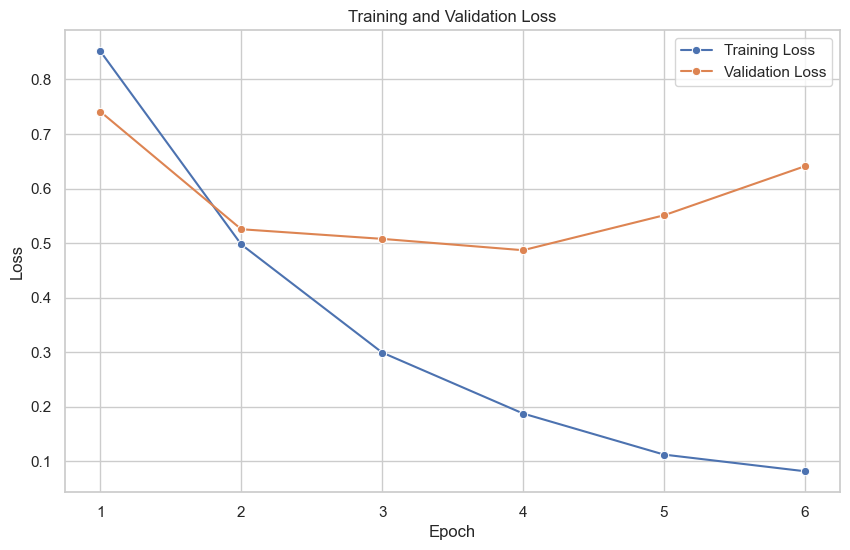

Text(0, 0.5, 'Accuracy')

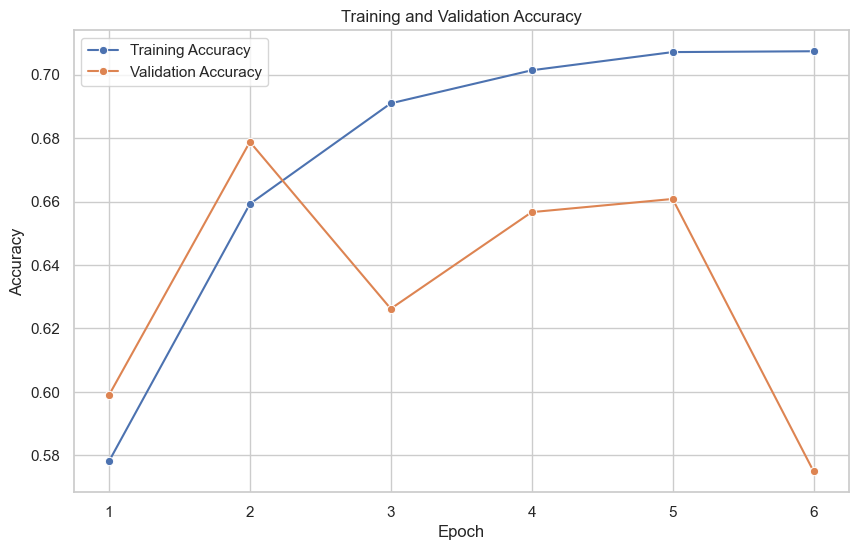

In [20]:
# Plotting the training and validation loss using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, label='Training Loss', marker='o')
sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(train_accuracies) + 1), y=train_accuracies, label='Training Accuracy', marker='o')
sns.lineplot(x=range(1, len(val_accuracies) + 1), y=val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

The plots show the training and validation loss and training and validation accuracy over five epochs for the model's performance.

Training and Validation Loss Plot:

The training loss decreases consistently with each epoch, indicating that the model is learning and fitting better to the training data.
The validation loss, however, shows a slight increase after the third epoch, suggesting potential overfitting, as the model's performance on validation data is no longer improving and may be starting to worsen slightly.

Training and Validation Accuracy Plot:

The training accuracy improves consistently, reaching around 0.58 by the fifth epoch.
The validation accuracy, while increasing overall, fluctuates and shows a less consistent improvement compared to the training accuracy, plateauing near 0.54 towards the end. This further suggests possible overfitting as the validation accuracy is not keeping pace with the training accuracy.
Overall, the model appears to fit the training and validation data well

**<h1><span style="color: BurlyWood;">5.0 Model Evaluation</span></h2>**
Evaluating the performance of the model on the test set

In [ ]:
# Evaluating with the Precision and Recall
metric_precision = Precision(task="multiclass", num_classes=num_class, average="macro")
metric_recall = Recall(task="multiclass", num_classes=num_class, average="macro")
net.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)
precision = metric_precision.compute()
recall = metric_recall.compute()
# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.8891
Recall: 0.8932


The model achieved a precision score of 0.8968 and a recall score of 0.8994. Excellent performance across both metrics

In [26]:
# checking the recall of each class
metric_recall = Recall(
task="multiclass", num_classes=num_class, average=None)
net.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_recall(preds, labels)
recall = metric_recall.compute()
# Define the label mapping
test_dataset.class_to_idx = {'Normal':0,'Glioma':1,'Meningioma':2,'Pituitary':3}
{
k: recall[v].item()
for k, v
in test_dataset.class_to_idx.items()
}


{'Normal': 0.9102773070335388,
 'Glioma': 0.843106210231781,
 'Meningioma': 0.8888888955116272,
 'Pituitary': 0.9306260347366333}

In [24]:
# Evaluating on overall Accuracy
metric_accuracy = Accuracy(task="multiclass", num_classes=num_class)

net.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_accuracy(preds, labels)

accuracy = metric_accuracy.compute()
print(f'Overall accuracy: {accuracy * 100:.2f}%')

Overall accuracy: 89.00%


The model achieved an overall accuracy of 89%.